#1. https://stackoverflow.com/questions/55736800/smooth-plotting-all-columns-of-a-data-frame

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_clipboard()

In [3]:
data.drop(['Index'], axis=1, inplace=True)
data

KeyError: "['Index'] not found in axis"

In [ ]:
def add_smooth_plots(df, ax,  timecolumn='Date', interpolation_method='cubic', colors='rgbky'):
    from itertools import cycle
    ind = pd.to_datetime(df.loc[:, timecolumn])
    tick_labels =ind.dt.strftime("%Y-%m-%d")
    color = cycle(colors)
    for i, col in enumerate(df.columns):
        if col != timecolumn:
            c = next(color)
            s = pd.Series(df.loc[:, col].values, index=ind)
            intp = s.resample('0.5D').interpolate(method=interpolation_method)
            true_ticks = intp.index.isin(ind)
            vals = intp.values
            intp = intp.reset_index()
            ticks = intp.index[true_ticks]
            ax.plot(np.arange(len(vals)), vals, label=col, color=c)
            ax.set_xticks(ticks)
            ax.set_xticklabels(tick_labels.values, rotation=45)
            ax.legend(title='Columns')
    return ax



In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

In [ ]:
add_smooth_plots(data, ax)


In [ ]:
plt.show()


#2. https://stackoverflow.com/questions/55739440/why-unboundlocalerror-occurs-when-inner-function-assign-value-to-local-variables/55739465?noredirect=1#comment98156261_55739465

In [ ]:
Lets look at bytecode: 

import dis


def outer2():
    number = 20
    def inner():
        if number >= 20:
            number
    inner()



def outer3():
    number = 20
    def inner():
        if number >= 20:
            number = number + 1
    inner()


def outer4():
    number = 20
    def inner():
        nonlocal number
        if number >= 20:
            number = number + 1
    inner()

>>> dis.dis(outer2)
  2           0 LOAD_CONST               1 (20)
              3 STORE_DEREF              0 (number)

  3           6 LOAD_CLOSURE             0 (number)
              9 BUILD_TUPLE              1
             12 LOAD_CONST               2 (<code object inner at 0x7ff003b56b70, file "<stdin>", line 3>)
             15 LOAD_CONST               3 ('outer2.<locals>.inner')
             18 MAKE_CLOSURE             0
             21 STORE_FAST               0 (inner)

  6          24 LOAD_FAST                0 (inner)
             27 CALL_FUNCTION            0 (0 positional, 0 keyword pair)
             30 POP_TOP
             31 LOAD_CONST               0 (None)
             34 RETURN_VALUE


>>> dis.dis(outer3)
  2           0 LOAD_CONST               1 (20)
              3 STORE_FAST               0 (number)

  3           6 LOAD_CONST               2 (<code object inner at 0x7ff003b56ae0, file "<stdin>", line 3>)
              9 LOAD_CONST               3 ('outer3.<locals>.inner')
             12 MAKE_FUNCTION            0
             15 STORE_FAST               1 (inner)

  6          18 LOAD_FAST                1 (inner)
             21 CALL_FUNCTION            0 (0 positional, 0 keyword pair)
             24 POP_TOP
             25 LOAD_CONST               0 (None)
             28 RETURN_VALUE


>>> dis.dis(outer4)
  2           0 LOAD_CONST               1 (20)
              3 STORE_DEREF              0 (number)

  3           6 LOAD_CLOSURE             0 (number)
              9 BUILD_TUPLE              1
             12 LOAD_CONST               2 (<code object inner at 0x7ff003af7e40, file "<stdin>", line 3>)
             15 LOAD_CONST               3 ('outer4.<locals>.inner')
             18 MAKE_CLOSURE             0
             21 STORE_FAST               0 (inner)

  7          24 LOAD_FAST                0 (inner)
             27 CALL_FUNCTION            0 (0 positional, 0 keyword pair)
             30 POP_TOP
             31 LOAD_CONST               0 (None)
             34 RETURN_VALUE

From these examples one can see, that trying to assign to a variable (that wasn't declared as nonlocal) 
yields in `MAKE_FUNCTION` opcode. But only closures allow to get access variables out of the current scope. 
You can also read more about closures [here](https://www.geeksforgeeks.org/python-closures/).

#3. https://stackoverflow.com/questions/55739779/century-handling-in-pandas/55739904#55739904

In [6]:
data = pd.read_clipboard(header=None)

In [14]:
pd.to_datetime(data[1].apply(lambda x: '-'.join(x.split('-')[:-1] + ['19' + x.split('-')[2]])))

0   1984-01-01
1   1985-07-31
2   1985-08-24
3   1993-12-30
4   1977-09-12
5   1990-08-09
6   1988-01-06
7   1989-04-10
8   1991-11-15
9   1968-01-06
Name: 1, dtype: datetime64[ns]

In [12]:
data

,0,1
0,0,01-01-84
1,1,31-07-85
2,2,24-08-85
3,3,30-12-93
4,4,09-12-77
5,5,08-09-90
6,6,01-06-88
7,7,04-10-89
8,8,15-11-91
9,9,01-06-68


#4. https://stackoverflow.com/questions/55743251/how-to-identify-outliers-with-density-plot

In [57]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

data = np.r_[np.random.randn(100), np.random.rand(10)*100][:, np.newaxis]

In [58]:
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(data)


In [59]:
yvals = kde.score_samples(data)
yvals[np.isinf(yvals)]=np.nan

plt.plot(yvals)

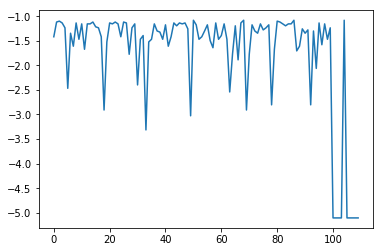

In [60]:
plt.show()

In [82]:
outlier_inds = np.where(yvals< np.percentile(yvals, 10))[0]
print(outlier_inds)
non_outlier_inds = np.where(yvals >= np.percentile(yvals, 10))[0]
print(non_outlier_inds)

[ 33  49 100 101 102 103 105 106 107 108 109]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 104]


In [91]:
plt.plot(non_outlier_inds, np.log(data[non_outlier_inds]), 'ro',
         outlier_inds, np.log(data[outlier_inds]), 'bo')
plt.gca().set_xlabel('Index')
plt.gca().set_ylabel('log(data)')
plt.legend()

/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


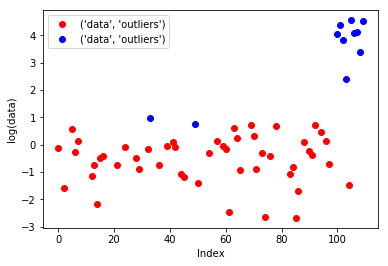

In [92]:
plt.show()


#5. https://stackoverflow.com/questions/55757907/delete-specific-rows-in-a-pandas-df/55757945#55757945

In [106]:
import pandas as pd

d = ({
    'Code' : ['Foo','Bar','Cat','Foo','Foo'],
    'Val' : ['x','y','a','a','x'],
    })

df = pd.DataFrame(d)

In [107]:
df[df.index.isin(df.index[df.Val=='x'].tolist()+(df.index[df.Val=='x'].values+1).tolist())]

,Code,Val
0,Foo,x
1,Bar,y
4,Foo,x


#5. https://stackoverflow.com/questions/55758599/how-to-add-prediction-to-polynomial-regression

It would be better if you define a class that would handle all logic you want. Nevertheless, If you want 
to write code that is fully compliant with fit-transform-predict protocol, that is used in scikit-learn, you need
to subclass from some base
classes of scikit-learn, e.g.  BaseEstimator, TransformerMixin, BaseRegressor.

Numpy supplied with very convenient function [vander](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.vander.html) that could significantly help you
when you are working with polynomials.

Lets define a class. 

In [132]:
class PolyRegressor:  # I omit subclassing for now. 
    
    def __init__(self, weights=None):
        self.weights = np.array(weights) if weights is not None else None

    @property
    def order(self):
        return len(self.weights) if self.weights is not None else 0
    
    def evaluate(self, x):
        return np.dot(np.vander(x, self.order), self.weights[:, np.newaxis]).ravel()
    
    def fit(self, X, y=None):
        self.weights = (np.linalg.pinv(np.vander(X, self.order)) @ y[:, np.newaxis]).ravel()
    
    def predict(self, X):
        if self.weights is not None: 
            return self.evaluate(X)
        else:
            raise Exception("Model wasn't fitted. Fit model first. ")
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

In [133]:
reg = PolyRegressor()

In [137]:
reg.weights = np.array([1,2,3])  # we implicitly define order = 2 here, e.g. 3 + 2x + 1x^2

In [139]:
reg.evaluate(np.array([5]))

array([38])

In [135]:
reg.fit_predict(np.random.rand(10), np.random.rand(10) * 5)

array([2.55922997, 1.81433623, 2.29153779, 1.78458414, 1.75961514,
       2.59770317, 2.65122647, 1.81313616, 2.61993941, 2.63325695])